In [2]:
%mkdir model

In [3]:
%cd model

C:\Users\Dudes\Downloads\SSD\model


In [ ]:
# load the pre-trained model and weights
!wget https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt

!wget https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel

In [4]:
import requests

# Download prototxt.txt model
url_txt = "https://raw.githubusercontent.com/georgiosouzounis/face-detection-ssd-caffe/main/model/deploy.prototxt.txt"
r = requests.get(url_txt, stream=True)
with open("deploy.prototxt.txt", "wb") as f:
    for chunk in r.iter_content(chunk_size=1024):
        if chunk:
            f.write(chunk)

# Download caffe model
url_cf = "https://github.com/georgiosouzounis/face-detection-ssd-caffe/raw/main/model/res10_300x300_ssd_iter_140000.caffemodel"
r = requests.get(url_cf)
with open("res10_300x300_ssd_iter_140000.caffemodel", "wb") as f:
    f.write(r.content)


In [9]:
import os
os.getcwd()

'C:\\Users\\Dudes\\Downloads\\SSD\\model'

In [11]:
%cd

C:\Users\Dudes


In [14]:
cd Downloads\SSD

C:\Users\Dudes\Downloads\SSD


In [16]:
root_path = os.getcwd()
print(root_path)

C:\Users\Dudes\Downloads\SSD


In [17]:
import numpy as np
import cv2 # openCV
print(cv2.__version__)

4.12.0


In [20]:
# load the serialized model from the local copy in model/
model_cfg = f"{root_path}\\model\\deploy.prototxt.txt"
model_weights = f"{root_path}\\model\\res10_300x300_ssd_iter_140000.caffemodel"

# read the model
detector = cv2.dnn.readNetFromCaffe(model_cfg, model_weights)

In [36]:
test_img = cv2.imread('macron.jpg')
(h, w) = test_img.shape[:2]

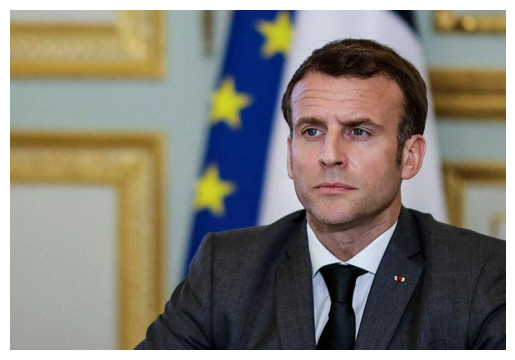

In [25]:
import matplotlib.pyplot as plt
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) # convert BGR → RGB
plt.imshow(img)
plt.axis("off")
plt.show()

## Deploy the detector

In [26]:
# set the intensity scaling factor; 1 in this case, i.e. original image intensities
scalefactor = 1.0
 
# set the new dimensions for image resizing to match the network requirements
new_size = (300, 300)

In [28]:
# create a blob using OpenCV's DNN functionality and by performing mean subtraction 
# to normalize the input

blob = cv2.dnn.blobFromImage(test_img, scalefactor, new_size, (127.5, 127.5, 127.5), swapRB=True, crop=False)

In [29]:
# set the blob as input to the network
detector.setInput(blob)
# compute the forward pass - detect faces if any
detections = detector.forward()
detections.shape

(1, 1, 200, 7)

In [30]:
# Declare an array
detections[0][0][0]

array([0.        , 1.        , 0.9996408 , 0.5665413 , 0.18484493,
       0.7850617 , 0.6287232 ], dtype=float32)

In [31]:
# compute the length of the array
len(detections[0][0])

200

In [32]:
# set the confidence threshold
confidence_threshold = 0.5

In [38]:
# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]
    # ignore weak detections
    if confidence > confidence_threshold:
        # compute the (x, y)-coordinates of the bounding box for the detected object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        # draw the bounding box of the detected face
        cv2.rectangle(test_img, (startX, startY), (endX, endY), (0, 0, 255), 2)
        # print the probability of this detection
        text = "confidence: {:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(test_img, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

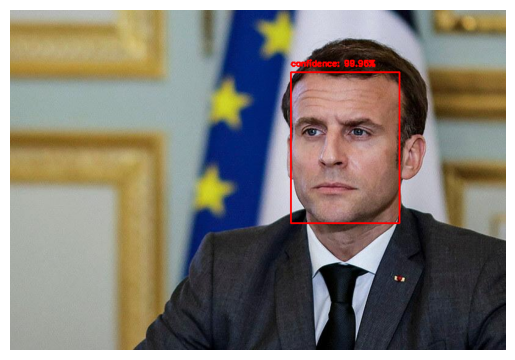

In [40]:
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) # convert BGR → RGB
plt.imshow(img)
plt.axis("off")
plt.show()